# Load and read the data

In [ ]:
# Importing the pandas
import pandas as pd

In [ ]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/BankNoteAuthentication.csv')

In [ ]:
# Visualize the data
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# Shape of the data
data.shape

(1372, 5)

In [ ]:
# Count the outcomes
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [ ]:
# Percentage contribution of each class
data['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

# Define input(X) and output(Y) features

In [ ]:
# Set X and Y
X = data.drop(['class'],axis=1).values
Y = data['class'].values

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [ ]:
# Check the shapes
print('Number of rows and columns of x_train resp {}'.format(x_train.shape))
print('Number of rows and columns of x_test  resp {}'.format(x_test.shape))

Number of rows and columns of x_train resp (960, 4)
Number of rows and columns of x_test  resp (412, 4)


In [ ]:
# input fetures patterns
print(x_train)

[[-0.56877  1.4174  -1.4252  -1.1246 ]
 [ 0.47368  3.3605  -4.5064  -4.0431 ]
 [ 1.0652   8.3682  -1.4004  -1.6509 ]
 ...
 [-7.0364   9.2931   0.16594 -4.5396 ]
 [-3.4605   2.6901   0.16165 -1.0224 ]
 [-3.3582  -7.2404  11.4419  -0.57113]]


# Initializing and training the Decision Tree Classifier

In [ ]:
# Initializing the classifier
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion='gini')

In [ ]:
# Training the classifier
%time DT_classifier.fit(x_train,y_train)

CPU times: user 4.92 ms, sys: 0 ns, total: 4.92 ms
Wall time: 4.35 ms


DecisionTreeClassifier()

# Evaluating the classifier

In [ ]:
# Training score
print('Training accuracy: {} %'.format(DT_classifier.score(x_train,y_train)*100))

Training accuracy: 100.0 %


In [ ]:
# Testing score
print('Testing accuracy: {} %'.format(DT_classifier.score(x_test,y_test)*100))

Testing accuracy: 98.30097087378641 %


In [ ]:
# Get the prediction on test data
y_pred = DT_classifier.predict(x_test)

In [ ]:
# Check the actual and predicted value
pd.DataFrame(data={'Actual_class':y_test,'Predicted_class':y_pred})

,Actual_class,Predicted_class
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
407,1,1
408,0,0
409,1,1
410,0,0


In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9830097087378641

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


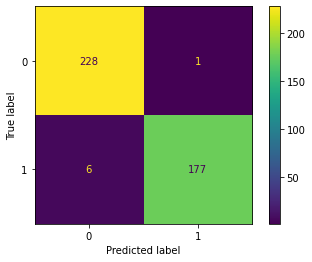

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DT_classifier, x_test, y_test)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       229
           1       0.99      0.97      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



# Visualizing the tree

In [ ]:
# Load the libraries
import sklearn.tree as tree
import graphviz

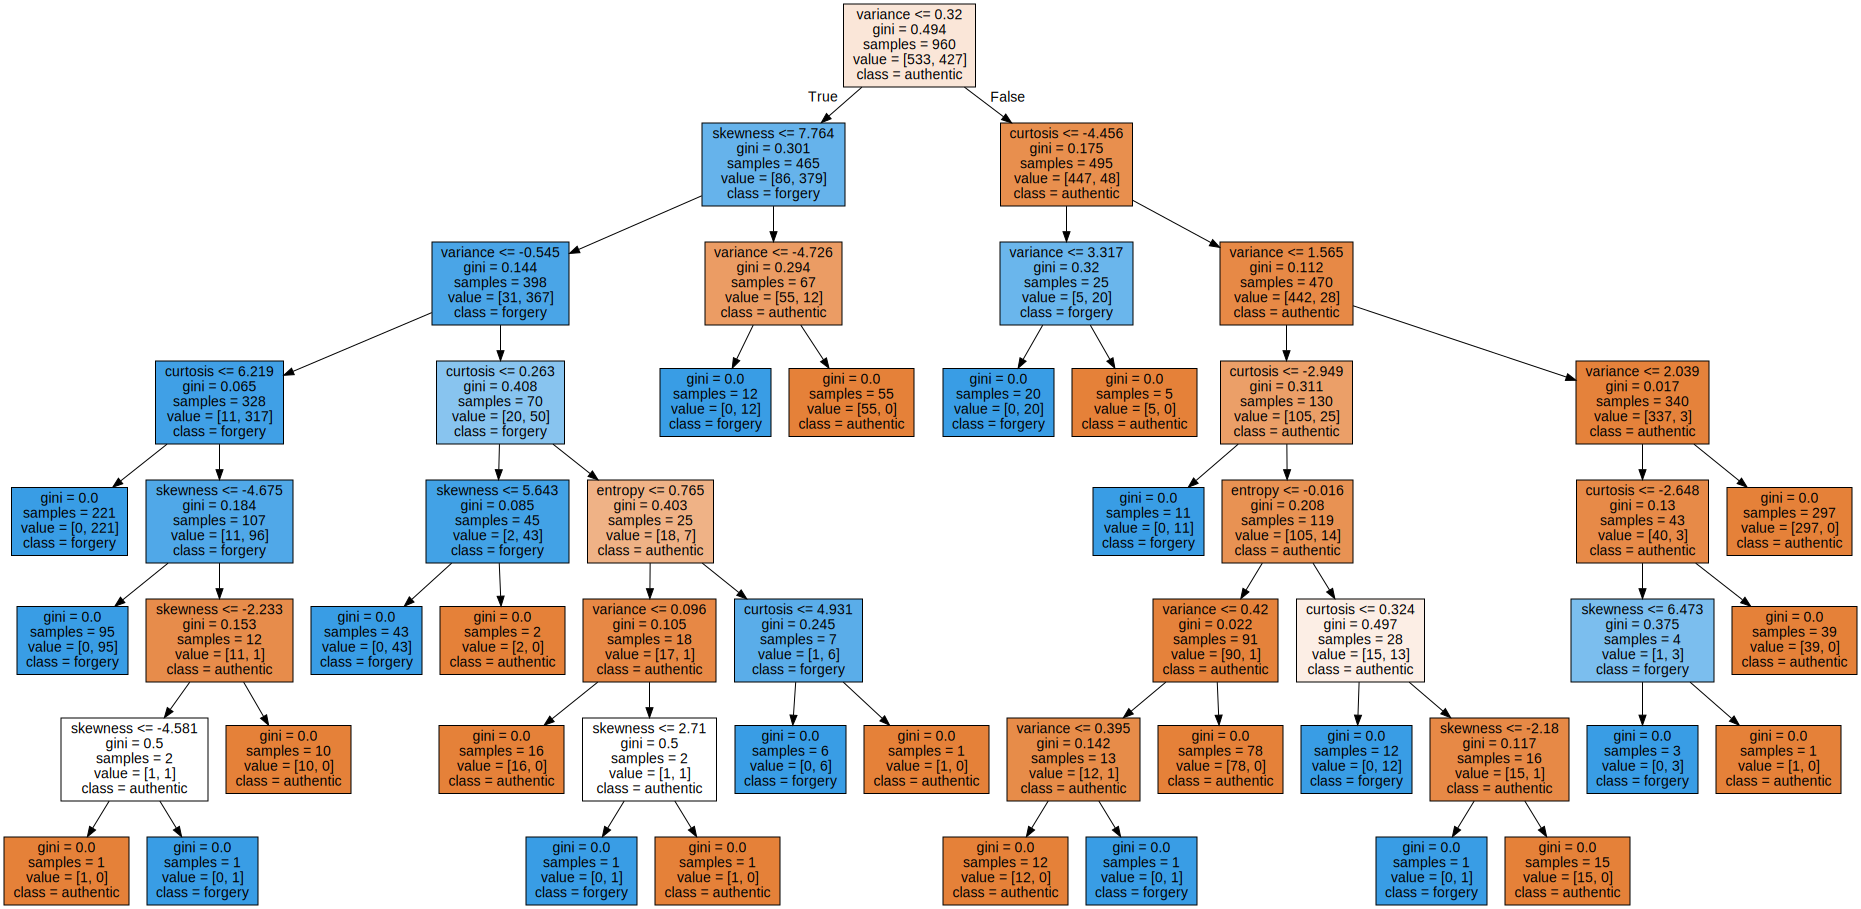

In [ ]:
# Get the data for graph
graph_data = tree.export_graphviz(DT_classifier, feature_names=['variance', 'skewness', 'curtosis', 'entropy'],
                                  class_names=['authentic', 'forgery'], filled=True)
# Plot graph
graph = graphviz.Source(graph_data, format="png")
graph

In [ ]:
# save the file
graph.render("decision_tree_graph")

'decision_tree_graph.png'